# Exploratary Data Analysis

## Load libraries and cleaned datasets

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
incidents = pd.read_csv("incidents_clean.csv")

In [3]:
nonmotorists = pd.read_csv("nonmotoristdf_clean.csv")

In [4]:
drivers = pd.read_csv("driverdf_clean.csv", low_memory = False)

In [5]:
maryland = pd.read_csv("marylanddf_clean.csv", low_memory = False)

In [6]:
dcdata = pd.read_csv("crashesDCdf_clean.csv", low_memory = False)

### Describe the data


In [7]:
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,fixed_object_struck,junction,intersection_type,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)"
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,OTHER,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)"
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)"


In [8]:
incidents_summary = incidents.describe()
incidents_summary

#.describe() only works with numeric columns, so this doesn't tell us much

,Unnamed: 0,lane_number,number_of_lanes,latitude,longitude
count,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000
mean,34383.500000,1.209929,2.066210,39.083623,-77.114498
std,19851.178643,0.980560,1.363726,0.073342,0.100838
min,1.000000,0.000000,0.000000,37.720000,-79.486000
25%,17192.250000,1.000000,1.000000,39.024416,-77.190991
50%,34383.500000,1.000000,2.000000,39.075623,-77.107445
75%,51574.750000,2.000000,3.000000,39.140405,-77.040893
max,68766.000000,8.000000,99.000000,39.990414,-75.527708


In [9]:
# convert date time to date-time type
incidents['crash_date_time'] = pd.to_datetime(incidents['crash_date_time'])

incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68766 entries, 0 to 68765
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    68766 non-null  int64         
 1   report_number                 68766 non-null  object        
 2   local_case_number             68766 non-null  object        
 3   agency_name                   68766 non-null  object        
 4   acrs_report_type              68766 non-null  object        
 5   crash_date_time               68766 non-null  datetime64[ns]
 6   hit_run                       68764 non-null  object        
 7   route_type                    68766 non-null  object        
 8   mile_point                    68766 non-null  object        
 9   mile_point_direction          68766 non-null  object        
 10  lane_direction                68766 non-null  object        
 11  lane_number                 

In [10]:
incidents['collision_type']

0             STRAIGHT MOVEMENT ANGLE
1             STRAIGHT MOVEMENT ANGLE
2                                 NaN
3                      SINGLE VEHICLE
4                               OTHER
                     ...             
68761         STRAIGHT MOVEMENT ANGLE
68762                           OTHER
68763    OPPOSITE DIRECTION SIDESWIPE
68764               SAME DIR REAR END
68765                  SINGLE VEHICLE
Name: collision_type, Length: 68766, dtype: object

This is data on the incident itself---information on the drivers or non-motorists involved, including whether or not they were injured and the severity of the injury, is in the non-motorists and drivers datasets.


In [11]:
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_actions,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,NO IMPROPER ACTIONS,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)"
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,OTHER,AT INTERSECTION MARKED CROSSWALK,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)"
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,OTHER,ON ROADWAY AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)"
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,WRONG WAY RIDING OR WALKING,ON ROADWAY NOT AT CROSSWALK,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)"


In [12]:
nonmotorists.describe()

,Unnamed: 0,local_case_number,latitude,longitude
count,3935.000000,3.935000e+03,3935.000000,3935.000000
mean,1968.000000,1.178792e+08,39.071346,-77.111106
std,1136.080983,8.370594e+07,0.069730,0.093772
min,1.000000,1.705200e+04,38.554005,-79.181926
25%,984.500000,1.603261e+07,39.012206,-77.180374
50%,1968.000000,1.705392e+08,39.061290,-77.098768
75%,2951.500000,1.900242e+08,39.121060,-77.045069
max,3935.000000,2.100105e+08,39.426657,-76.916257


In [13]:
nonmotorists['crash_date_time'] = pd.to_datetime(nonmotorists['crash_date_time'])

nonmotorists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        3935 non-null   int64         
 1   report_number                     3935 non-null   object        
 2   local_case_number                 3935 non-null   int64         
 3   agency_name                       3935 non-null   object        
 4   acrs_report_type                  3935 non-null   object        
 5   crash_date_time                   3935 non-null   datetime64[ns]
 6   route_type                        3935 non-null   object        
 7   road_name                         3061 non-null   object        
 8   cross_street_type                 3935 non-null   object        
 9   cross_street_name                 3060 non-null   object        
 10  off_road_description              874 non-null  

In [14]:
nonmotorists['injury_severity'].unique()

array(['SUSPECTED MINOR INJURY', 'POSSIBLE INJURY',
       'SUSPECTED SERIOUS INJURY', 'NO APPARENT INJURY', 'FATAL INJURY'],
      dtype=object)

Interesting choices for "injury severity."  Barring more information from Montgomery County, I'll assume "no" means minor or no injury and "yes" means severe injury.

In [83]:
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,35,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,40,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)"


In [16]:
drivers.describe()

,Unnamed: 0,speed_limit,vehicle_year,latitude,longitude
count,121918.000000,121918.000000,121918.000000,121918.000000,121918.000000
mean,60959.500000,32.845150,1968.563133,39.082338,-77.112506
std,35194.839397,11.026851,330.898944,0.072441,0.099753
min,1.000000,0.000000,0.000000,37.720000,-79.486000
25%,30480.250000,30.000000,2005.000000,39.023325,-77.188295
50%,60959.500000,35.000000,2010.000000,39.074329,-77.105470
75%,91438.750000,40.000000,2014.000000,39.137990,-77.040108
max,121918.000000,70.000000,9999.000000,39.990414,-75.527708


In [84]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121918 entries, 0 to 121917
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      121918 non-null  int64         
 1   report_number                   121918 non-null  object        
 2   local_case_number               121918 non-null  object        
 3   agency_name                     121918 non-null  object        
 4   acrs_report_type                121918 non-null  object        
 5   crash_date_time                 121918 non-null  datetime64[ns]
 6   route_type                      110115 non-null  object        
 7   road_name                       110715 non-null  object        
 8   cross_street_type               121918 non-null  object        
 9   cross_street_name               110710 non-null  object        
 10  off_road_description            11202 non-null   object 

In [85]:
drivers['crash_date_time'] = pd.to_datetime(drivers['crash_date_time'])
drivers.info()
drivers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121918 entries, 0 to 121917
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      121918 non-null  int64         
 1   report_number                   121918 non-null  object        
 2   local_case_number               121918 non-null  object        
 3   agency_name                     121918 non-null  object        
 4   acrs_report_type                121918 non-null  object        
 5   crash_date_time                 121918 non-null  datetime64[ns]
 6   route_type                      110115 non-null  object        
 7   road_name                       110715 non-null  object        
 8   cross_street_type               121918 non-null  object        
 9   cross_street_name               110710 non-null  object        
 10  off_road_description            11202 non-null   object 

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,35,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,40,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)"


In [19]:
drivers['injury_severity'].unique()

array(['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY',
       'SUSPECTED SERIOUS INJURY', 'FATAL INJURY'], dtype=object)

These are definitely clearer than the non-motorists information.

### Merge dataframes into one

In [20]:
moCoDetails = incidents.merge(drivers, on = 'report_number', how = 'outer')
moCoDetails.columns
moCoDetails.info()
moCoDetails.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122369 entries, 0 to 122368
Data columns (total 88 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0_x                    122368 non-null  float64       
 1   report_number                   122369 non-null  object        
 2   local_case_number_x             122368 non-null  object        
 3   agency_name_x                   122368 non-null  object        
 4   acrs_report_type_x              122368 non-null  object        
 5   crash_date_time_x               122368 non-null  datetime64[ns]
 6   hit_run                         122366 non-null  object        
 7   route_type_x                    122368 non-null  object        
 8   mile_point                      122368 non-null  object        
 9   mile_point_direction            122368 non-null  object        
 10  lane_direction                  122368 non-null  object 

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude_y,longitude_y,location_y
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,5.0,No,No,1999.0,FORD,EXPEDITION,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,15.0,No,No,2016.0,NISSAN,SENTRA,NO MISUSE,39.188862,-77.202455,"(39.18886167, -77.202455)"
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,15.0,No,No,2012.0,NISSAN,MURANO,NO MISUSE,39.188862,-77.202455,"(39.18886167, -77.202455)"
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,10.0,No,No,2016.0,FORD,TK,NaN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,5.0,No,No,2019.0,FORD,F350,NO MISUSE,39.129216,-77.167342,"(39.1292155, -77.16734233)"


In [21]:
moCoDetails = moCoDetails.merge(nonmotorists, on = 'report_number', how ='outer')
moCoDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122559 entries, 0 to 122558
Columns: 120 entries, Unnamed: 0_x to location
dtypes: datetime64[ns](3), float64(14), object(103)
memory usage: 113.1+ MB


In [22]:
moCoDetails.crash_date_time_x

0        2020-05-02 14:16:00
1        2020-09-15 15:33:00
2        2020-09-15 15:33:00
3        2020-10-14 08:40:00
4        2020-03-03 09:19:00
                 ...        
122554   2021-03-08 14:15:00
122555   2021-03-08 14:15:00
122556   2021-03-08 14:15:00
122557   2021-03-17 21:15:00
122558                   NaT
Name: crash_date_time_x, Length: 122559, dtype: datetime64[ns]

In [23]:
moCoDetails['year'] = pd.DatetimeIndex(moCoDetails['crash_date_time_x']).year
moCoDetails.head()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [24]:
moCoDetails['month'] = pd.DatetimeIndex(moCoDetails['crash_date_time_x']).month
moCoDetails.head()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,5.0
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,9.0
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,9.0
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,10.0
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,3.0


In [25]:
moCoDetails['month_year'] = pd.to_datetime(moCoDetails['crash_date_time_x']).dt.to_period('M')
moCoDetails.head()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month,month_year
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,5.0,2020-05
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,9.0,2020-09
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,9.0,2020-09
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,10.0,2020-10
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,3.0,2020-03


In [26]:
 moCoDetails.groupby('month_year').count()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month
month_year,,,,,,,,,,,,,,,,,,,,,
2015-01,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632,...,36,51,0,51,19,51,51,51,1632,1632
2015-02,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,...,28,45,1,45,17,45,45,45,1576,1576
2015-03,1452,1452,1452,1452,1452,1452,1451,1452,1452,1452,...,32,45,2,45,16,45,45,45,1452,1452
2015-04,1541,1541,1541,1541,1541,1541,1540,1541,1541,1541,...,19,40,0,40,14,40,40,40,1541,1541
2015-05,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859,...,40,63,1,63,28,63,63,63,1859,1859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,...,31,43,43,43,34,43,43,43,1161,1161
2020-12,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,...,22,35,35,35,23,35,35,35,1250,1250
2021-01,933,933,933,933,933,933,933,933,933,933,...,21,33,33,33,26,33,33,33,933,933


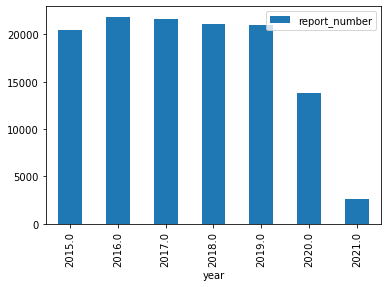

In [27]:
moCoCrashesbyTime = moCoDetails[['year','report_number']]
moCoCrashesbyTime.groupby('year').count().plot(kind = 'bar')
plt.show()




In [28]:
moCoCrashesbyTime['year'].min()

2015.0

In [29]:
moCoCrashesbyTime.groupby('year').count()

,report_number
year,
2015.0,20449
2016.0,21879
2017.0,21669
2018.0,21116
2019.0,21024
2020.0,13857
2021.0,2564


In [30]:
moCoCrashesbySeverity = moCoDetails[['year', 'report_number', 'acrs_report_type']]

In [31]:
moCoCrashesbySeverity['acrs_report_type']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
122554    NaN
122555    NaN
122556    NaN
122557    NaN
122558    NaN
Name: acrs_report_type, Length: 122559, dtype: object

Why is "acrs_report_type" now NaN?

Working with the merged dataframe didn't really help me, I'm going to go back to working with each frame separately, and then combine only the entries I need.

In [32]:
incidents.columns

Index(['Unnamed: 0', 'report_number', 'local_case_number', 'agency_name',
       'acrs_report_type', 'crash_date_time', 'hit_run', 'route_type',
       'mile_point', 'mile_point_direction', 'lane_direction', 'lane_number',
       'lane_type', 'number_of_lanes', 'direction', 'distance',
       'distance_unit', 'road_grade', 'nontraffic', 'road_name',
       'cross_street_type', 'cross_street_name', 'off_road_description',
       'municipality', 'related_non_motorist', 'at_fault', 'collision_type',
       'weather', 'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse',
       'first_harmful_event', 'second_harmful_event', 'fixed_object_struck',
       'junction', 'intersection_type', 'intersection_area', 'road_alignment',
       'road_condition', 'road_division', 'latitude', 'longitude', 'location'],
      dtype='object')

In [33]:
incidents['acrs_report_type']

0        Property Damage Crash
1                 Injury Crash
2        Property Damage Crash
3        Property Damage Crash
4        Property Damage Crash
                 ...          
68761    Property Damage Crash
68762    Property Damage Crash
68763    Property Damage Crash
68764    Property Damage Crash
68765    Property Damage Crash
Name: acrs_report_type, Length: 68766, dtype: object

In [87]:
# Add a column for year
incidents['year'] = pd.DatetimeIndex(incidents['crash_date_time']).year
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location,year,month,month_year
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)",2020,5,2020-05
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)",2020,9,2020-09
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)",2020,10,2020-10
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)",2020,3,2020-03
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)",2020,11,2020-11


In [35]:
# Add a column for month
incidents['month'] = pd.DatetimeIndex(incidents['crash_date_time']).month
#incidents.head()

In [36]:
# Add a column for month and year
incidents['month_year'] = pd.to_datetime(incidents['crash_date_time']).dt.to_period('M')
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location,year,month,month_year
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)",2020,5,2020-05
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)",2020,9,2020-09
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)",2020,10,2020-10
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)",2020,3,2020-03
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)",2020,11,2020-11


In [37]:
incidentsAnnual = incidents[['year', 'acrs_report_type', 'report_number', 'related_non_motorist']]

In [38]:
yearlydf= incidentsAnnual.groupby(['year','acrs_report_type']).size()
yearlydf

year  acrs_report_type     
2015  Fatal Crash                34
      Injury Crash             4159
      Property Damage Crash    7275
2016  Fatal Crash                29
      Injury Crash             4424
      Property Damage Crash    7648
2017  Fatal Crash                26
      Injury Crash             4315
      Property Damage Crash    7763
2018  Fatal Crash                29
      Injury Crash             4208
      Property Damage Crash    7629
2019  Fatal Crash                32
      Injury Crash             4030
      Property Damage Crash    7598
2020  Fatal Crash                40
      Injury Crash             2656
      Property Damage Crash    5364
2021  Fatal Crash                 2
      Injury Crash              444
      Property Damage Crash    1061
dtype: int64

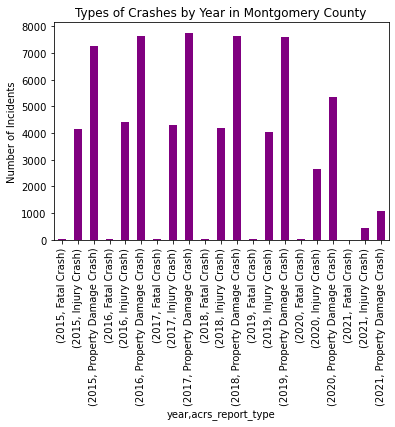

In [119]:
fig, ax = plt.subplots(1)
ax.set(title="Types of Crashes by Year in Montgomery County", 
      ylabel="Number of Incidents",
      xlabel="Type of Crash")



yearlydf.plot.bar(color = 'purple')



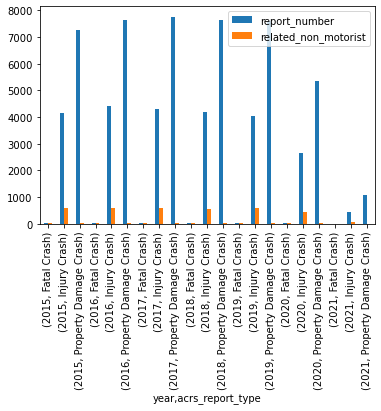

In [40]:
incidentsAnnual.groupby(['year','acrs_report_type']).count().plot(kind='bar')


In [41]:
isFatal = incidentsAnnual['acrs_report_type'] == 'Fatal Crash'
isFatal

0        False
1        False
2        False
3        False
4        False
         ...  
68761    False
68762    False
68763    False
68764    False
68765    False
Name: acrs_report_type, Length: 68766, dtype: bool

In [42]:
fatalIncidents = incidentsAnnual[isFatal]
fatalIncidents

,year,acrs_report_type,report_number,related_non_motorist
215,2019,Fatal Crash,EJ7869002Y,PEDESTRIAN
1679,2020,Fatal Crash,MCP24920019,PEDESTRIAN
1738,2020,Fatal Crash,MCP3118002T,NaN
1886,2019,Fatal Crash,MCP24920012,NaN
1945,2019,Fatal Crash,MCP2563000Y,NaN
...,...,...,...,...
67797,2020,Fatal Crash,MCP2348005X,NaN
68026,2020,Fatal Crash,MCP2348005Z,NaN
68111,2020,Fatal Crash,MCP2492001J,NaN
68539,2021,Fatal Crash,MCP20080089,PEDESTRIAN


In [43]:
fatalIncidents.groupby(['year']).size()

year
2015    34
2016    29
2017    26
2018    29
2019    32
2020    40
2021     2
dtype: int64

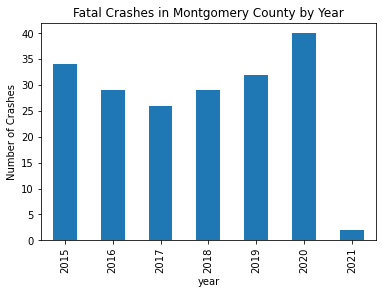

In [44]:
plt.title("Fatal Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

fatalIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

Fatal Incidents increased in 2019, obviously not the goal of the Vision Zero plan.  Let's look at the severe injuries.

In [45]:
isInjury = incidentsAnnual['acrs_report_type']== "Injury Crash"
injuryIncidents = incidentsAnnual[isInjury]
injuryIncidents

,year,acrs_report_type,report_number,related_non_motorist
1,2020,Injury Crash,MCP3245000H,NaN
11,2020,Injury Crash,MCP27270029,NaN
14,2020,Injury Crash,MCP31730016,NaN
16,2020,Injury Crash,MCP3111002K,BICYCLIST
17,2020,Injury Crash,MCP11130036,NaN
...,...,...,...,...
68740,2021,Injury Crash,MCP3165002M,NaN
68748,2021,Injury Crash,MCP2923007J,NaN
68749,2021,Injury Crash,EJ7889000K,NaN
68757,2021,Injury Crash,MCP3127001P,NaN


In [46]:
injuryIncidents.groupby('year').size()

year
2015    4159
2016    4424
2017    4315
2018    4208
2019    4030
2020    2656
2021     444
dtype: int64

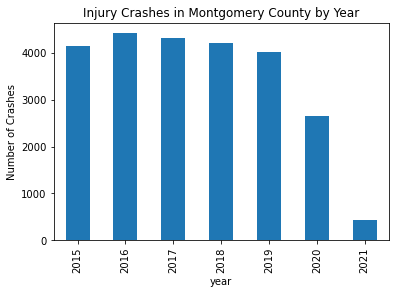

In [47]:
plt.title("Injury Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

injuryIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

Injury crashes decreased, while the number of fatal crashes increased.  What type of crashes were most likely to be fatal?

Examine the "related_non_motorist" column in the fatal incidents dataframe to see what happened with the numbers of non-motorists killed in accidents.

In [48]:
fatalIncidents.groupby(['year', 'related_non_motorist']).size()

year  related_non_motorist
2015  BICYCLIST                3
      PEDESTRIAN              11
2016  BICYCLIST                3
      OTHER CONVEYANCE         1
      PEDESTRIAN               7
2017  OTHER CONVEYANCE         1
      PEDESTRIAN              11
2018  BICYCLIST                1
      PEDESTRIAN              15
2019  BICYCLIST                1
      PEDESTRIAN              13
2020  BICYCLIST                1
      OTHER                    1
      OTHER CONVEYANCE         1
      PEDESTRIAN              14
2021  PEDESTRIAN               2
dtype: int64

See if this matches the information in the nonmotorists dataframe.

In [49]:
nonmotorists['year'] = pd.DatetimeIndex(nonmotorists['crash_date_time']).year
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,AT INTERSECTION MARKED CROSSWALK,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,ON ROADWAY AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,ON ROADWAY NOT AT CROSSWALK,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019


In [50]:
nonmotorists['month'] = pd.DatetimeIndex(nonmotorists['crash_date_time']).month
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019,6
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019,6
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019,6
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019,6
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019,5


In [90]:
# Add a column for month and year
nonmotorists['month_year'] = pd.to_datetime(nonmotorists['crash_date_time']).dt.to_period('M')
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month,month_year
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019,6,2019-06
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019,6,2019-06
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019,6,2019-06
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019,6,2019-06
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019,5,2019-05


In [51]:
nonmotorists.groupby(['year', 'acrs_report_type']).size()

year  acrs_report_type     
2015  Fatal Crash               14
      Injury Crash             613
      Property Damage Crash     47
2016  Fatal Crash               11
      Injury Crash             619
      Property Damage Crash     46
2017  Fatal Crash               12
      Injury Crash             650
      Property Damage Crash     48
2018  Fatal Crash               16
      Injury Crash             575
      Property Damage Crash     39
2019  Fatal Crash               15
      Injury Crash             598
      Property Damage Crash     43
2020  Fatal Crash               17
      Injury Crash             460
      Property Damage Crash     50
2021  Fatal Crash                2
      Injury Crash              56
      Property Damage Crash      4
dtype: int64

Good news!  The numbers of fatalities in the nonmotorists dataframe match the numbers in the fatal incidents above, so we can just work with the nonmotorists dataframe to see how those numbers changed over time.

In [52]:
# Extract the fatal crashes from this dataframe
isFatal = nonmotorists['acrs_report_type'] == 'Fatal Crash'
isFatal
nonMotoristFatalIncidents = nonmotorists[isFatal]
nonMotoristFatalIncidents

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month
96,97,MCP24920019,200002735,Montgomery County Police,Fatal Crash,2020-01-16 18:33:00,Maryland (State),ROCKVILLE PIKE,Municipality,WOOTTON PKWY,...,NO PED. SIGNAL,DARK CLOTHING,Yes,FATAL INJURY,NaN,39.077990,-77.140867,"(39.07798974, -77.140867)",2020,1
294,295,MCP2492000B,15028338,Montgomery County Police,Fatal Crash,2015-06-11 09:00:00,County,CRABBS BRANCH WAY,County,REDLAND RD,...,UNKNOWN,DARK CLOTHING,NaN,FATAL INJURY,NONE,39.121038,-77.158527,"(39.12103805, -77.15852737)",2015,6
302,303,MCP2683003M,190006583,Montgomery County Police,Fatal Crash,2019-02-10 18:47:00,County,MONTGOMERY VILLAGE AVE,Maryland (State),MIDCOUNTY HWY,...,UNKNOWN,DARK CLOTHING,Unknown,FATAL INJURY,NONE,39.157968,-77.201475,"(39.15796833, -77.201475)",2019,2
304,305,MCP20010017,200000963,Montgomery County Police,Fatal Crash,2020-01-06 18:26:00,Maryland (State),GEORGIA AVE,Unknown,ENT TO CEMETERY,...,NO PED. SIGNAL,DARK CLOTHING,Yes,FATAL INJURY,NONE,39.081007,-77.075253,"(39.08100667, -77.07525333)",2020,1
362,363,MCP24920016,190043484,Montgomery County Police,Fatal Crash,2019-09-11 10:20:00,Unknown,COPLEY PLACE,Unknown,ENTRANCE TO HARRIS TEETER PARKING LOT,...,NO PED. SIGNAL,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.114815,-77.206930,"(39.11481531, -77.20692953)",2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,3894,MCP12270013,200007223,Montgomery County Police,Fatal Crash,2020-02-12 19:05:00,Maryland (State),MIDCOUNTY HWY,County,PIER POINT PL,...,NO PED. SIGNAL,MIXED CLOTHING,Yes,FATAL INJURY,NONE,39.159245,-77.198483,"(39.15924546, -77.19848265)",2020,2
3895,3896,MCP1301001J,210001908,Montgomery County Police,Fatal Crash,2021-01-15 20:16:00,Maryland (State),NEW HAMPSHIRE AVE,County,POWDER MILL RD,...,NO PED. SIGNAL,REFLECTIVE MATERIAL,Unknown,FATAL INJURY,REFLECTIVE CLOTHING,39.021283,-76.976950,"(39.02128333, -76.97695)",2021,1
3903,3904,MCP2348005W,200034859,Montgomery County Police,Fatal Crash,2020-09-05 22:37:00,Maryland (State),UNIVERSITY BLVD E,County,LANGLEY DR,...,NO PED. SIGNAL,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.001584,-76.995494,"(39.00158406, -76.99549353)",2020,9
3925,3926,MCP20080089,210009231,Montgomery County Police,Fatal Crash,2021-03-11 21:08:00,Maryland (State),NEW HAMPSHIRE AVE,Interstate (State),CAPITAL BELTWAY,...,NO PED. SIGNAL,DARK CLOTHING,Unknown,FATAL INJURY,NaN,39.017227,-76.977091,"(39.01722684, -76.97709106)",2021,3


In [53]:
nonMotoristFatalIncidents.groupby('year').size()

year
2015    14
2016    11
2017    12
2018    16
2019    15
2020    17
2021     2
dtype: int64

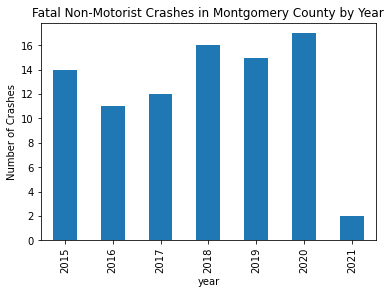

In [54]:
plt.title("Fatal Non-Motorist Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

nonMotoristFatalIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

In [55]:
# combine pedestrian and non-pedestrian so we can plot them side-by-side

fatalities = fatalIncidents.merge(nonMotoristFatalIncidents, on = 'report_number', how = 'outer')
fatalities.columns
fatalities.info()
fatalities.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year_x                            193 non-null    int64         
 1   acrs_report_type_x                193 non-null    object        
 2   report_number                     193 non-null    object        
 3   related_non_motorist_x            87 non-null     object        
 4   Unnamed: 0                        87 non-null     float64       
 5   local_case_number                 87 non-null     float64       
 6   agency_name                       87 non-null     object        
 7   acrs_report_type_y                87 non-null     object        
 8   crash_date_time                   87 non-null     datetime64[ns]
 9   route_type                        87 non-null     object        
 10  road_name                         83 non-null     

,year_x,acrs_report_type_x,report_number,related_non_motorist_x,Unnamed: 0,local_case_number,agency_name,acrs_report_type_y,crash_date_time,route_type,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year_y,month
0,2019,Fatal Crash,EJ7869002Y,PEDESTRIAN,447.0,190026072.0,Gaithersburg Police,Fatal Crash,2019-05-31 21:24:00,Maryland (State),...,NO PED. SIGNAL,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.161286,-77.222830,"(39.16128577, -77.22282999)",2019.0,5.0
1,2020,Fatal Crash,MCP24920019,PEDESTRIAN,97.0,200002735.0,Montgomery County Police,Fatal Crash,2020-01-16 18:33:00,Maryland (State),...,NO PED. SIGNAL,DARK CLOTHING,Yes,FATAL INJURY,NaN,39.077990,-77.140867,"(39.07798974, -77.140867)",2020.0,1.0
2,2020,Fatal Crash,MCP3118002T,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Fatal Crash,MCP24920012,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Fatal Crash,MCP2563000Y,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


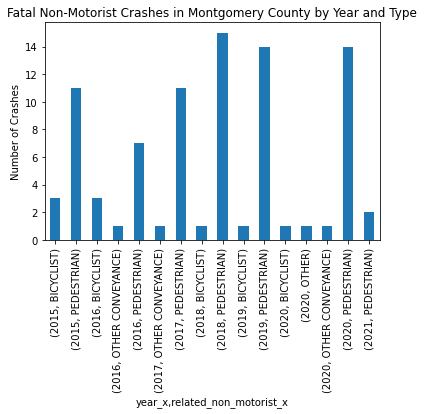

In [107]:
plt.title("Fatal Non-Motorist Crashes in Montgomery County by Year and Type")
plt.xlabel("Year and Type of Non-Motorist")
plt.ylabel("Number of Crashes")

fatalities.groupby(['year_x', 'related_non_motorist_x']).size().plot(kind='bar')

I want to plot non-motorist fatalities next to all fatalities.  To do that, I need to see what the "non-motorist" markers are in the incidents column and in the fatalities column of that name.

In [73]:
incidents['related_non_motorist'].unique()

array([nan, 'BICYCLIST', 'PEDESTRIAN', 'OTHER CONVEYANCE', 'OTHER',
       'BICYCLIST, PEDESTRIAN', 'MACHINE OPERATOR/RIDER',
       'OTHER PEDALCYCLIST', 'OTHER, PEDESTRIAN',
       'OTHER, OTHER CONVEYANCE', 'MACHINE OPERATOR/RIDER, OTHER',
       'BICYCLIST, OTHER', 'IN ANIMAL-DRAWN VEH'], dtype=object)

I suspect nan means no non-motorist is involved, but will check the original data on the webpage to confirm.  Once confirmed, I will replace "nan" with "No Non-Motorist Involved."  (Note:  in the original data, if no non-motorist was involved, the spot was left blank---thus, 'nan'.

In [74]:
# just verifying that's the case with the merged data as well
fatalities['related_non_motorist_y'].unique()

array(['PEDESTRIAN', nan, 'OTHER', 'BICYCLIST', 'OTHER CONVEYANCE'],
      dtype=object)

In [76]:
fatalities['related_non_motorist'] = fatalities['related_non_motorist_y'].fillna("No Non-Motorist Involved")
fatalities['related_non_motorist'].unique()

array(['PEDESTRIAN', 'No Non-Motorist Involved', 'OTHER', 'BICYCLIST',
       'OTHER CONVEYANCE'], dtype=object)

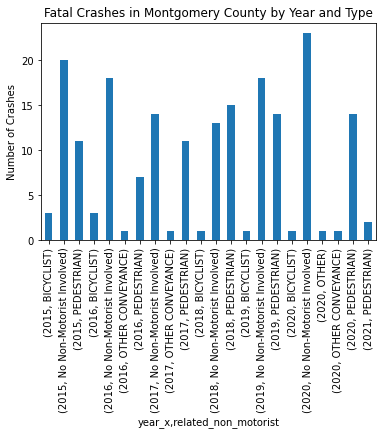

In [111]:
plt.title("Fatal Crashes in Montgomery County by Year and Type")
plt.xlabel("Year and Type of Crash")
plt.ylabel("Number of Crashes")

fatalities.groupby(['year_x', 'related_non_motorist']).size().plot(kind='bar')

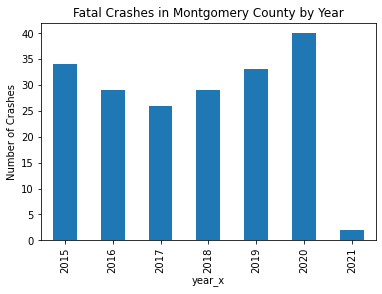

In [114]:
plt.title("Fatal Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
fatalities.groupby(['year_x']).size().plot(kind='bar')

Not only does VisionZero intend to lower the number of injuries and fatalities in Montgomery County crashes, but also the severity of this injuries that do occur.  Information on injury severity is included in the drivers and nonmotorists dataframes.

In [88]:
# Add a column for year
drivers['year'] = pd.DatetimeIndex(drivers['crash_date_time']).year
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020


In [89]:
#Add a column for month
drivers['month'] = pd.DatetimeIndex(drivers['crash_date_time']).month
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year,month
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020,6
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020,4
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020,4
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020,4
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020,4


In [91]:
# Add a column for month and year
drivers['month_year'] = pd.to_datetime(drivers['crash_date_time']).dt.to_period('M')
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year,month,month_year
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020,6,2020-06
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020,4,2020-04
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020,4,2020-04
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020,4,2020-04
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020,4,2020-04


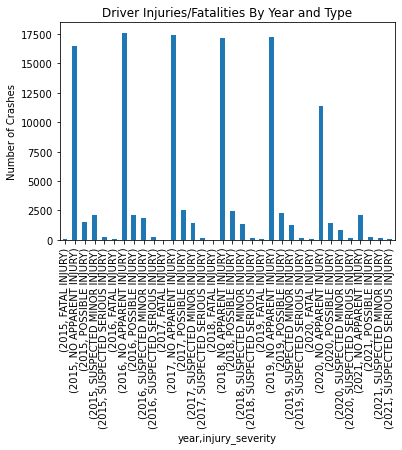

In [115]:
plt.title("Driver Injuries/Fatalities By Year and Type")
plt.xlabel("Year and Type")
plt.ylabel("Number of Crashes")

drivers.groupby(['year', 'injury_severity']).size().plot(kind= 'bar')

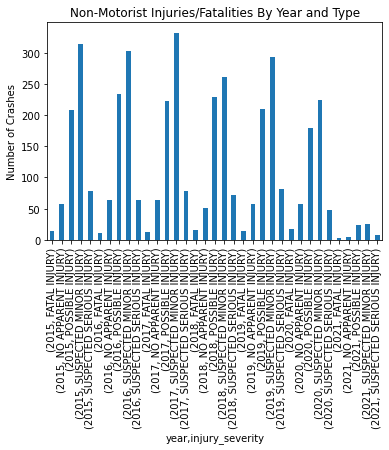

In [116]:
plt.title("Non-Motorist Injuries/Fatalities By Year and Type")
plt.xlabel("Year and Type")
plt.ylabel("Number of Crashes")

nonmotorists.groupby(['year', 'injury_severity']).size().plot(kind = 'bar')

That's obviously way too detailed to be of use.

In [98]:
# Extract the "suspected serious injury" cases from the data
seriousInjuries = drivers['injury_severity'] == 'SUSPECTED SERIOUS INJURY'
seriousInjuryDriver = drivers[seriousInjuries]
seriousInjuryDriver['injury_severity']

24        SUSPECTED SERIOUS INJURY
317       SUSPECTED SERIOUS INJURY
955       SUSPECTED SERIOUS INJURY
1012      SUSPECTED SERIOUS INJURY
1072      SUSPECTED SERIOUS INJURY
                    ...           
121570    SUSPECTED SERIOUS INJURY
121721    SUSPECTED SERIOUS INJURY
121728    SUSPECTED SERIOUS INJURY
121740    SUSPECTED SERIOUS INJURY
121769    SUSPECTED SERIOUS INJURY
Name: injury_severity, Length: 1034, dtype: object

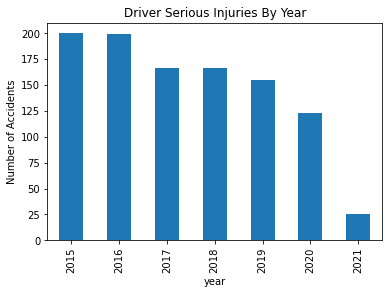

In [117]:
plt.title("Driver Serious Injuries By Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
seriousInjuryDriver.groupby(['year']).size().plot(kind = 'bar')

In [99]:
seriousInjuriesN = nonmotorists['injury_severity'] == 'SUSPECTED SERIOUS INJURY'
seriousInjuryNonDriver = nonmotorists[seriousInjuriesN]
seriousInjuryNonDriver['injury_severity']

10      SUSPECTED SERIOUS INJURY
15      SUSPECTED SERIOUS INJURY
21      SUSPECTED SERIOUS INJURY
45      SUSPECTED SERIOUS INJURY
46      SUSPECTED SERIOUS INJURY
                  ...           
3882    SUSPECTED SERIOUS INJURY
3902    SUSPECTED SERIOUS INJURY
3906    SUSPECTED SERIOUS INJURY
3919    SUSPECTED SERIOUS INJURY
3934    SUSPECTED SERIOUS INJURY
Name: injury_severity, Length: 429, dtype: object

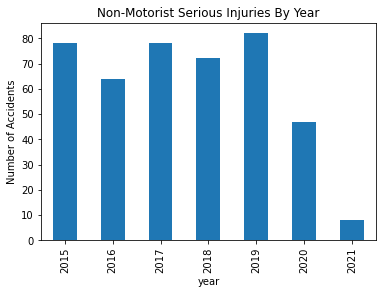

In [118]:
plt.title("Non-Motorist Serious Injuries By Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

seriousInjuryNonDriver.groupby(['year']).size().plot(kind = 'bar')

### Work on the Maryland State Data

In [57]:
maryland.head()

,Unnamed: 0,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [58]:
maryland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665555 entries, 0 to 665554
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             665555 non-null  int64  
 1   YEAR                   665555 non-null  int64  
 2   QUARTER                665555 non-null  object 
 3   LIGHT_DESC             642520 non-null  object 
 4   LIGHT_CODE             665555 non-null  float64
 5   COUNTY_DESC            665551 non-null  object 
 6   COUNTY_NO              665551 non-null  float64
 7   MUNI_DESC              0 non-null       float64
 8   MUNI_CODE              490165 non-null  float64
 9   JUNCTION_DESC          577189 non-null  object 
 10  JUNCTION_CODE          598197 non-null  float64
 11  COLLISION_TYPE_DESC    665555 non-null  object 
 12  COLLISION_TYPE_CODE    665555 non-null  int64  
 13  SURF_COND_DESC         596327 non-null  object 
 14  SURF_COND_CODE         598197 non-nu

In [59]:
maryland.describe()

,Unnamed: 0,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,...,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,665555.000000,665555.000000,665555.000000,665551.000000,0.0,490165.000000,598197.000000,665555.000000,598197.000000,504731.000000,...,665555.000000,6.655550e+05,665555.000000,665555.000000,532863.000000,594700.000000,579661.000000,525664.000000,665555.000000,665555.000000
mean,332777.000000,2017.429922,3.996784,12.802138,NaN,109.223621,2.659336,21.197332,2.681054,1.483862,...,6.275458,2.017498e+07,3.931861,2.135590,972.831996,4.811965,66.611606,1287.337172,39.146989,-76.744990
std,192129.323542,1.669810,13.710754,7.890507,NaN,296.811599,9.974512,29.842747,9.303266,0.803901,...,10.375600,1.669977e+04,8.559274,7.605476,1631.052868,7.172188,144.807532,1923.735560,0.309653,0.466552
min,0.000000,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.015010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,-79.996100
25%,166388.500000,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,...,6.010000,2.016063e+07,1.000000,0.000000,90.000000,0.250000,0.000000,62.000000,38.984103,-76.940814
50%,332777.000000,2017.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,...,6.010000,2.017120e+07,1.000000,0.000000,260.000000,1.670000,0.500000,360.000000,39.230493,-76.706645
75%,499165.500000,2019.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,...,6.010000,2.019052e+07,3.000000,1.000000,935.500000,6.450000,50.000000,1675.000000,39.346335,-76.575476
max,665554.000000,2020.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,...,99.000000,2.020123e+07,99.000000,99.000000,9914.000000,558.000000,1000.000000,9914.000000,39.994802,-75.000000


What we need to know from the Maryland data is where the accidents occurred (ideally we'd like to compare Montgomery County with Prince George's and Frederick Counties), what kind of fatalities or injuries were involved, and when did the accidents take place.  We know from the description above that the earliest year was 2015 and the most recent is 2020.

These are coded by numbers, so we'll have to go back to the Maryland data site and establish the key to the code.   The site has a dictionary for this set, and related sets, including the persons data, which includes injury information.  The next step is to download that.


In [120]:
marylanddrivers = pd.read_csv("https://opendata.maryland.gov/api/views/py4c-dicf/rows.csv?accessType=DOWNLOAD", low_memory = False)
marylanddrivers.head()

,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,REPORT_NO,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR,Quarter
0,Female,F,Apparently Normal,1.0,No Injury,1,AE59920005,NaN,NaN,NaN,...,53cfb29a-b39b-4af2-85df-cf88d7215e79,MD,C,False,False,eacd0575-64e1-44f9-bd53-16449620c109,NaN,0.0,2017,Q2
1,Male,M,NaN,NaN,Non-incapacitating Injury,2,DA40650004,Right Front Seat,3.0,NaN,...,cb90b978-e091-4422-9ead-684355d3f4a8,NaN,NaN,NaN,NaN,ac456b44-041f-4a85-bedd-1a75fd5ff81a,A,1.0,2017,Q2
2,Female,F,NaN,NaN,Possible Incapacitating Injury,3,ZU7729000P,Center Rear Seat,5.0,NaN,...,c56e2fdd-fa91-4d49-bae9-aa1e9b51efbd,NaN,NaN,NaN,NaN,1b1906ca-09cb-4018-9273-9f215cb5d5d3,A,1.0,2016,Q2
3,Male,M,NaN,NaN,No Injury,1,CT8278002X,Right Rear Seat,6.0,NaN,...,aa15e7f7-e40e-4fdb-aedb-a966c71c7bc8,NaN,NaN,NaN,NaN,1cd6afef-9669-41a2-acd2-dee9af76f2c4,NaN,1.0,2018,Q3
4,Female,F,Apparently Normal,1.0,No Injury,1,DA3660000B,NaN,NaN,NaN,...,80375a09-f4bb-4d11-88c6-c399bafcc693,DC,NaN,False,False,b5e6a3b9-7e40-4d2d-98e9-ed32dee9a90c,NaN,NaN,2015,Q2


In [122]:
marylanddrivers.columns

Index(['SEX_DESC', 'SEX_CODE', 'CONDITION_DESC', 'CONDITION_CODE',
       'INJ_SEVER_DESC', 'INJ_SEVER_CODE', 'REPORT_NO', 'OCC_SEAT_POS_DESC',
       'OCC_SEAT_POS_CODE', 'PED_VISIBLE_DESC', 'PED_VISIBLE_CODE',
       'PED_OBEY_DESC', 'PED_OBEY_CODE', 'PED_TYPE_DESC', 'PED_TYPE_CODE',
       'PED_LOCATION_CODE', 'MOVEMENT_DESC', 'MOVEMENT_CODE',
       'PERSON_TYPE_DESC', 'PERSON_TYPE', 'ALCOHOL_TEST_DESC',
       'ALCOHOL_TEST_CODE', 'ALCOHOL_TESTTYPE_DESC', 'ALCOHOL_TESTTYPE_CODE',
       'DRUG_TEST_DESC', 'DRUG_TEST_CODE', 'DRUG_TESTRESULT_DESC',
       'DRUG_TESTRESULT_CODE', 'BAC_CODE', 'FAULT_FLAG_DESC', 'FAULT_FLAG',
       'EQUIP_PROB_DESC', 'EQUIP_PROB_CODE', 'SAF_EQUIP_DESC',
       'SAF_EQUIP_CODE', 'EJECT_DESC', 'EJECT_CODE', 'DATE_OF_BIRTH',
       'PERSON_ID', 'LICENSE_STATE_CODE', 'CLASS', 'CDL_FLAG_DESC', 'CDL_FLAG',
       'VEHICLE_ID', 'EMS_UNIT_LABEL', 'AIRBAG_DEPLOYED', 'YEAR', 'Quarter'],
      dtype='object')

This dataset includes information on each passenger in the vehicle.  Since I'm interested in the numbers of injuries and fatalities (not the number of fatal crashes), I can view this that way.  To determine the county, though, I will have to combine this with the accidents one.

In [127]:
marylandCrashes = maryland.merge(marylanddrivers, on = 'REPORT_NO', how = 'inner')
marylandCrashes.head()

,Unnamed: 0,YEAR_x,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR_y,Quarter
0,0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,...,53715bb2-0082-4089-9a9e-62eabfd94dc8,NaN,NaN,False,False,3c9e8766-8b2a-4774-b85c-c645f2eabba0,NaN,0.0,2020,Q2
1,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,2a107168-e876-4624-be53-b123f41cf3ae,MD,NaN,False,False,6e506abc-74ce-46a2-b48c-2e09cdb1c20f,B,1.0,2020,Q2
2,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,9fe87418-8ebe-4ebd-9bd0-b6b16c2555c4,NaN,NaN,False,False,dd5c5d0a-2a52-4473-a33e-a7441e238b37,NaN,1.0,2020,Q2
3,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,7c40af46-a448-4759-9c87-c029dc6f9ab4,MD,NaN,False,False,d8ade674-0336-4221-a2b0-f998ae7d4f36,NaN,1.0,2020,Q2
4,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,a488a97c-3b5c-426d-a282-00ac93517677,MD,NaN,False,False,2212f949-edeb-4183-9b28-681904096b0e,A,2.0,2020,Q2


In [128]:
marylandCrashes.to_csv("marylandCrashes.csv")

In [129]:
marylandCrashes['INJ_SEVER_DESC']

0                               No Injury
1          Possible Incapacitating Injury
2                               No Injury
3                               No Injury
4          Possible Incapacitating Injury
                        ...              
1496128                         No Injury
1496129                         No Injury
1496130                         No Injury
1496131                         No Injury
1496132         Non-incapacitating Injury
Name: INJ_SEVER_DESC, Length: 1496133, dtype: object

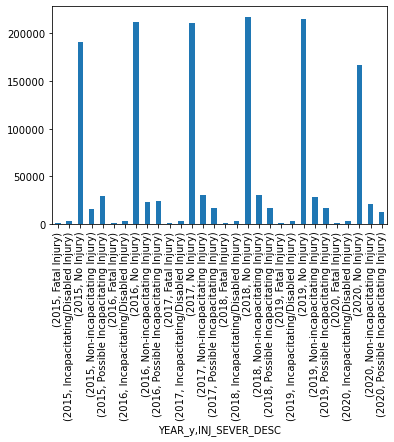

In [130]:
marylandCrashes.groupby(["YEAR_y", "INJ_SEVER_DESC" ]).size().plot(kind = 'bar')

In [60]:
dcdata.head()

,Unnamed: 0,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,...,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
0,0,-77.006951,38.918116,196643590,28706951,21030453,2021/03/10 02:41:05+00,0,0.0,0.03,...,38.918108,-77.006948,399397.42,138915.43,07a29377cde1b2f67f7f1a5a965d0061,8506a607f11e09cd25cfa1ae7b88794e,0,0,0,0
1,1,-76.958994,38.861884,196643591,28706963,21030393,2021/03/10 02:57:24+00,0,0.0,9.05,...,38.861887,-76.958888,403514.94,132765.83,ab55d6e159798aed740401182f3c13df,4fcf5db17d7664ee7d3a46821ce40eac,0,0,0,0
2,2,-76.959820,38.866301,196643592,28706971,21030427,2021/03/10 03:23:07+00,0,0.0,5.81,...,38.866286,-76.959884,403505.80,133242.59,dee80528d92cfc0c4dda9f3e54c52e90,dee80528d92cfc0c4dda9f3e54c52e90,0,0,2,0
3,3,-76.950678,38.888687,196643593,28706992,21030392,2021/03/10 04:11:48+00,0,0.0,19.24,...,38.888816,-76.950812,404235.48,135672.00,a3e5f13770b6585ef17a27609b6ff214,c217cd384f2c0a25fd43923f3bc51064,0,0,0,0
4,4,-76.954054,38.895986,196643594,28706994,21030376,2021/03/10 04:05:27+00,0,0.0,16.57,...,38.895832,-76.954091,404151.99,136570.94,910e58e4349e828dd7d2f1d069d2c19e,910e58e4349e828dd7d2f1d069d2c19e,0,0,0,0


In [61]:
dcdata.describe()

,Unnamed: 0,X,Y,OBJECTID,CRIMEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,MARID,...,SPEEDING_INVOLVED,OFFINTERSECTION,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
count,246150.000000,246150.000000,246150.000000,2.461500e+05,2.461500e+05,246150.000000,246150.000000,208314.000000,208314.000000,246150.000000,...,246150.000000,246150.000000,179105.000000,179105.000000,125610.000000,125610.000000,246150.000000,246150.000000,246150.000000,246150.000000
mean,123074.500000,-76.494467,38.544046,1.967669e+08,2.677255e+07,1601.944153,12.304979,5421.424259,15562.867426,283144.278192,...,0.016933,24.613433,38.407944,-76.302035,399488.590918,137211.540379,0.000325,0.023181,0.078582,0.009161
std,71057.528718,5.907968,4.139513,7.105755e+04,1.231118e+06,1737.660667,13.534176,4662.984094,11257.260292,224868.930131,...,0.129114,42.206848,4.845788,6.906587,3144.640103,3495.281619,0.018905,0.298373,0.374839,0.129506
min,0.000000,-78.815503,-9.000001,1.966436e+08,2.341134e+07,0.000000,0.000000,-9.000000,0.000000,1.000000,...,0.000000,0.000000,-9.000000,-78.815500,390097.460000,127294.260000,0.000000,0.000000,0.000000,0.000000
25%,61537.250000,-77.031966,38.887591,1.967054e+08,2.659068e+07,299.190000,0.050000,299.000000,6298.000000,155992.000000,...,0.000000,0.140000,38.885543,-77.031298,397370.190000,135297.587500,0.000000,0.000000,0.000000,0.000000
50%,123074.500000,-77.010198,38.904277,1.967669e+08,2.689185e+07,1077.130000,6.870000,5053.500000,12863.000000,272087.000000,...,0.000000,12.920000,38.903545,-77.009240,399239.105000,137287.830000,0.000000,0.000000,0.000000,0.000000
75%,184611.750000,-76.984209,38.922425,1.968284e+08,2.773601e+07,2285.910000,21.550000,9459.000000,23624.000000,301051.000000,...,0.000000,32.180000,38.920743,-76.983647,401533.520000,139210.520000,0.000000,0.000000,0.000000,0.000000
max,246149.000000,77.012717,40.737137,1.968900e+08,2.872196e+07,10750.110000,50.000000,15824.000000,40635.000000,914195.000000,...,2.000000,973.450000,40.737129,76.997665,407828.720000,147354.210000,2.000000,51.000000,17.000000,15.000000


In [62]:
dcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246150 entries, 0 to 246149
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  246150 non-null  int64  
 1   X                           246150 non-null  float64
 2   Y                           246150 non-null  float64
 3   OBJECTID                    246150 non-null  int64  
 4   CRIMEID                     246150 non-null  int64  
 5   CCN                         246150 non-null  object 
 6   REPORTDATE                  246150 non-null  object 
 7   ROUTEID                     246150 non-null  object 
 8   MEASURE                     246150 non-null  float64
 9   OFFSET                      246150 non-null  float64
 10  STREETSEGID                 208314 non-null  float64
 11  ROADWAYSEGID                208314 non-null  float64
 12  FROMDATE                    246150 non-null  object 
 13  TODATE        